# ABS Quarterly Producer Prices Index  6427

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Get-data-from-ABS" data-toc-modified-id="Get-data-from-ABS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get data from ABS</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Set-up-some-constants-we-will-use-across-all-plots" data-toc-modified-id="Set-up-some-constants-we-will-use-across-all-plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Set-up some constants we will use across all plots</a></span></li><li><span><a href="#Remove-the-old-charts" data-toc-modified-id="Remove-the-old-charts-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Remove the old charts</a></span></li><li><span><a href="#Headline-PPI-for-Australia" data-toc-modified-id="Headline-PPI-for-Australia-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Headline PPI for Australia</a></span></li><li><span><a href="#Lesser-PPIs---no-ABS-pre-calculated-percentages" data-toc-modified-id="Lesser-PPIs---no-ABS-pre-calculated-percentages-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Lesser PPIs - no ABS pre-calculated percentages</a></span></li></ul></li><li><span><a href="#Finished" data-toc-modified-id="Finished-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finished</a></span></li></ul></div>

## Python set-up

In [1]:
# system imports
import sys
import pathlib  
import re

# analytic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# local imports
from finalise_plot import finalise_plot
from abs_common import (
    get_fs_constants,
    get_plot_constants,
    get_ABS_meta_and_data,
    find_id,
    plot_growth2
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

# plotting stuff
plt.style.use('fivethirtyeight')

In [2]:
catalogue_id = '6427'
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

## Get data from ABS

In [3]:
# do the data capture and extraction to a DataFrame
abs_dict = get_ABS_meta_and_data(catalogue_id)
if abs_dict is None:
    sys.exit(-1)

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [4]:
meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)

In [5]:
#meta

,Data Item Description,Series Type,Series ID,Series Start,Series End,No. Obs.,Unit,Data Type,Freq.,Collection Month,Table,Table Description
1,Index Numbers ; Final ; Total (Source) ;,Original,A2314865F,1998-09-01,2022-12-01,98.0,Index Numbers,INDEX,Quarter,3.0,1,"Final demand, Index Numbers and Percentage Changes."
2,Percentage change from previous quarter ; Final ; Total (Source) ;,Original,A2314866J,1998-12-01,2022-12-01,97.0,Percent,PERCENT,Quarter,3.0,1,"Final demand, Index Numbers and Percentage Changes."
3,Percentage change from corresponding quarter of previous year ; Final ; Total (Source) ;,Original,A2314867K,1999-09-01,2022-12-01,94.0,Percent,PERCENT,Quarter,3.0,1,"Final demand, Index Numbers and Percentage Changes."
1,Index Number ; Coal mining ;,Original,A83737106J,1987-09-01,2022-12-01,142.0,Index Numbers,INDEX,Quarter,3.0,11,"Input to the Coal mining industry, index numbers and percentage changes"
2,Percentage change from previous quarter ; Coal mining ;,Original,A83737107K,1987-09-01,2022-12-01,142.0,Percent,PERCENT,Quarter,3.0,11,"Input to the Coal mining industry, index numbers and percentage changes"
3,Percentage change from corresponding quarter of previous year ; Coal mining ;,Original,A83737108L,1987-09-01,2022-12-01,142.0,Percent,PERCENT,Quarter,3.0,11,"Input to the Coal mining industry, index numbers and percentage changes"
1,Index Numbers ; Manufacturing division ;,Original,A2305166A,1968-09-01,2022-12-01,218.0,Index Numbers,INDEX,Quarter,3.0,12,"Output of the Manufacturing industries, division, subdivision, group and class index numbers"
2,Percentage change from previous quarter ; Manufacturing division ;,Original,A2305167C,1968-12-01,2022-12-01,217.0,Percent,PERCENT,Quarter,3.0,12,"Output of the Manufacturing industries, division, subdivision, group and class index numbers"
3,Percentage change from corresponding quarter of previous year ; Manufacturing division ;,Original,A2305168F,1969-09-01,2022-12-01,214.0,Percent,PERCENT,Quarter,3.0,12,"Output of the Manufacturing industries, division, subdivision, group and class index numbers"
4,Index Numbers ; 11 Food product manufacturing ;,Original,A3343827C,2001-09-01,2022-12-01,86.0,Index Numbers,INDEX,Quarter,3.0,12,"Output of the Manufacturing industries, division, subdivision, group and class index numbers"


### Remove the old charts

In [6]:
for filename in pathlib.Path(CHART_DIR).glob("*.png"):
    filename.unlink()

### Headline PPI for Australia

In [7]:
quarterly_phrase = 'Percentage change from previous quarter'
annual_phrase = 'Percentage change from corresponding quarter of previous year'

desc_col = 'Data Item Description'
table_col = 'Table'

final = 'Final ;  Total (Source)'

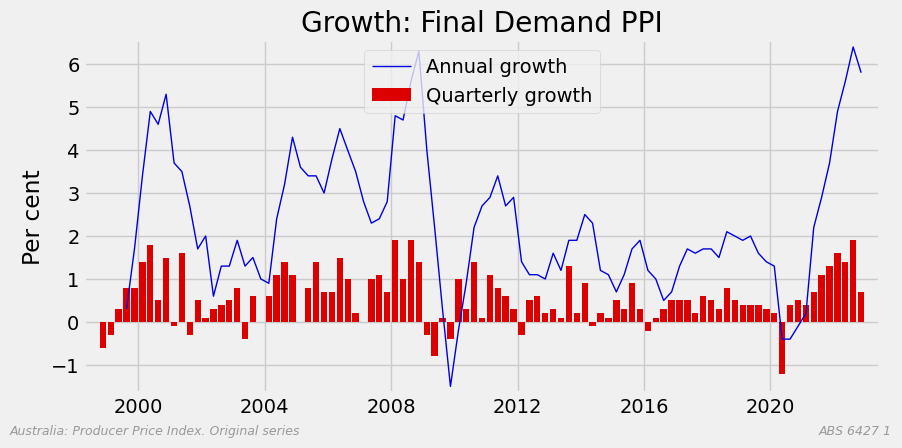

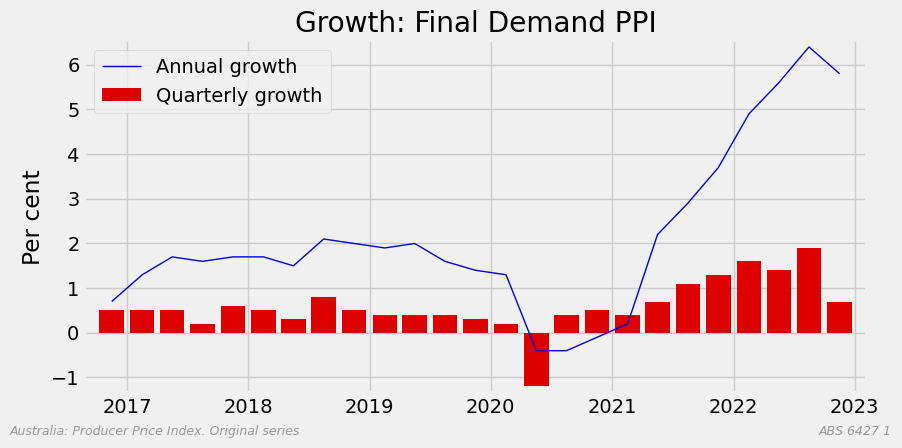

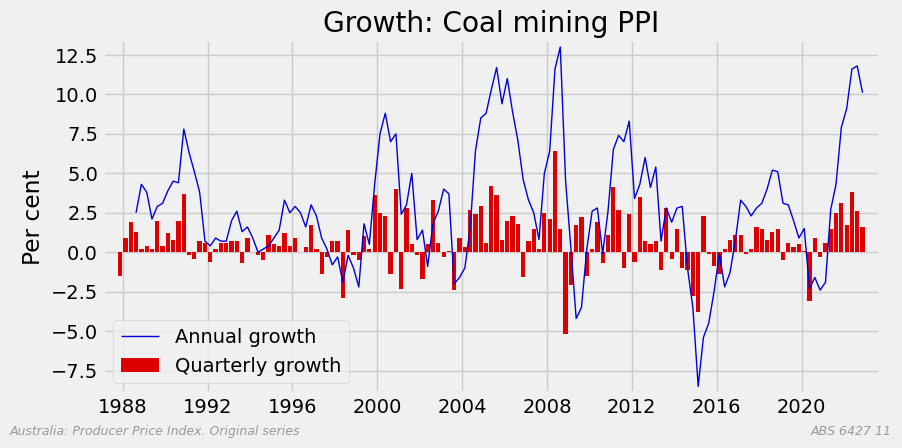

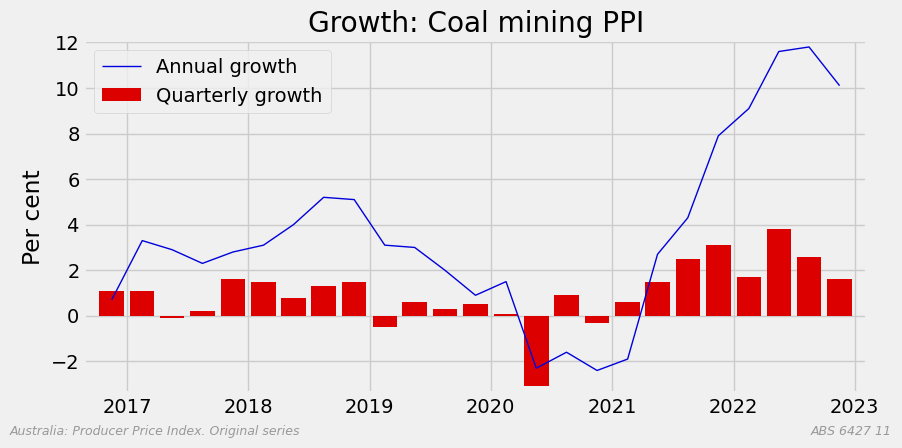

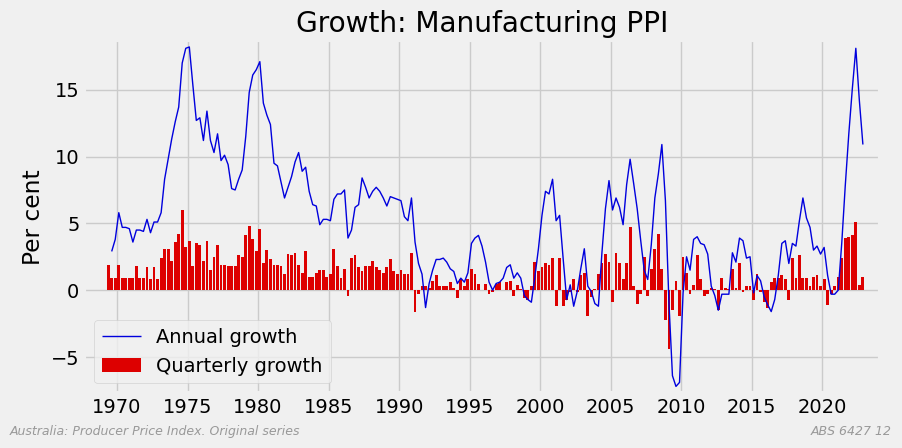

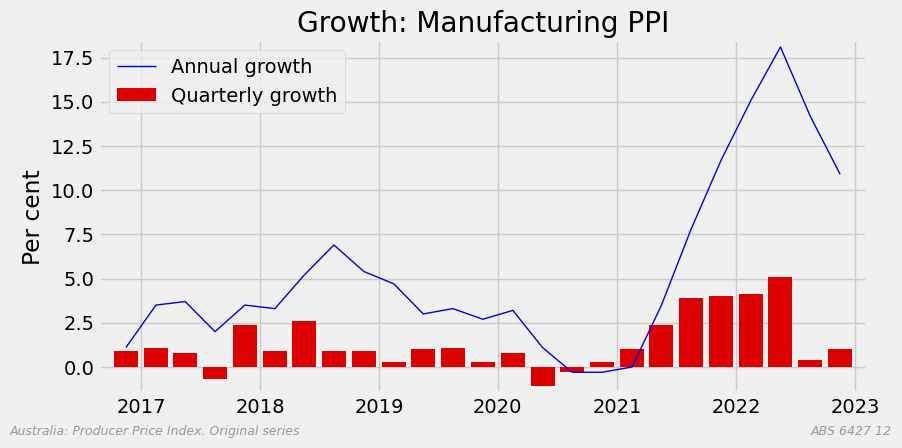

In [8]:
get = {
    (final, '1'): 'Final Demand',
    ('Coal mining', '11'): 'Coal mining',
    ('Manufacturing division', '12'): 'Manufacturing',
    #('Building construction Australia', '17'): 'Building construction Australia',
    #('Road freight transport ', '21'): ' Road freight transport ',
    
}

for key, label in get.items():
    select_phrase, table = key
    data = abs_dict[table]
    identifiers = []
    for phrase in annual_phrase, quarterly_phrase:
        terms = {
            table: table_col,
            select_phrase: desc_col, 
            phrase: desc_col, 
        }
        ident, units = find_id(meta, terms, verbose=False)
        identifiers.append(ident)

    # plot
    title = f'Growth: {label} PPI'
    for plot_from, plot_tag in zip(plot_times, plot_tags):
        plot_growth2(data[identifiers[0]], data[identifiers[1]], 
                     title, 
                     plot_from, plot_tag, CHART_DIR,
                     rfooter=f'{source} {table}',
                     lfooter=f'Australia: Producer Price Index. Original series',
                     ppy=4, # four periods per year
                     show=True
                 )
    

### Lesser PPIs - no ABS pre-calculated percentages

Searching 505: term: 17 in-column: Table
Searching 44: term: 30 Building construction Australia ; in-column: Data Item Description
Searching 1: term: Index Number in-column: Data Item Description
1


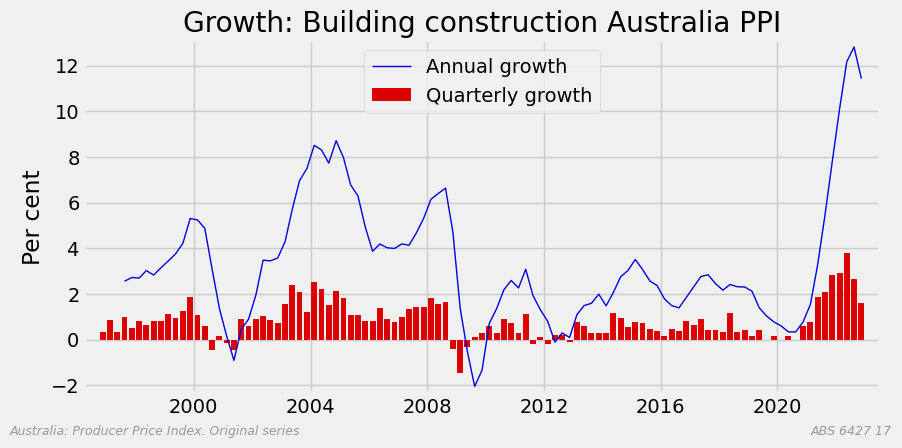

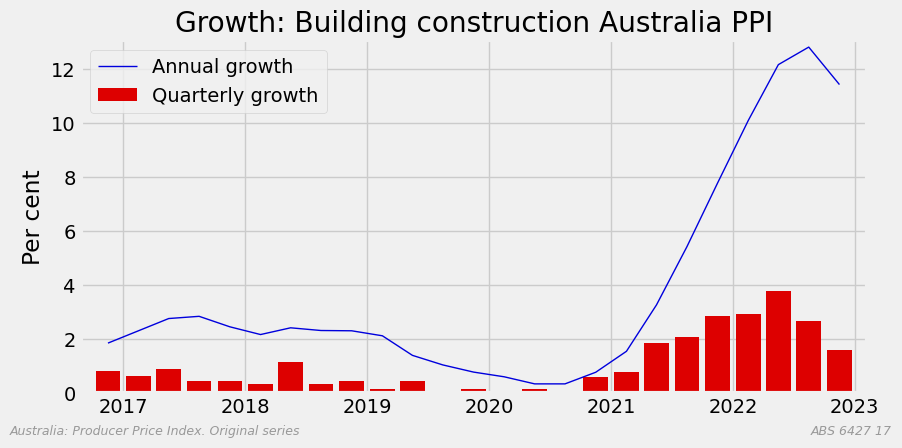

Searching 505: term: 21 in-column: Table
Searching 17: term: Road freight transport  in-column: Data Item Description
Searching 1: term: Index Number in-column: Data Item Description
1


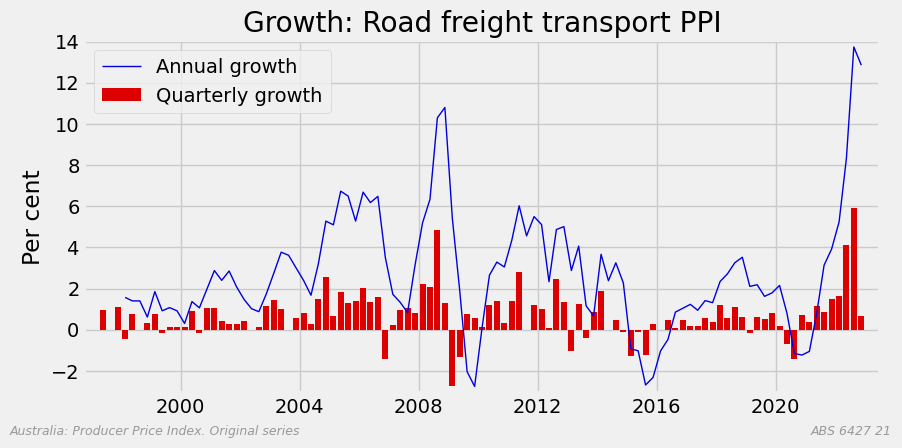

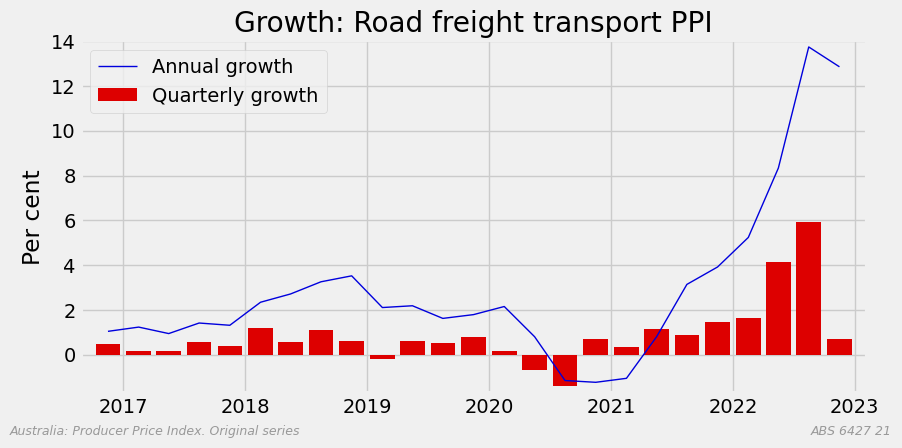

Searching 505: term: 25 in-column: Table
Searching 11: term: Employment services in-column: Data Item Description
Searching 1: term: Index Number in-column: Data Item Description
1


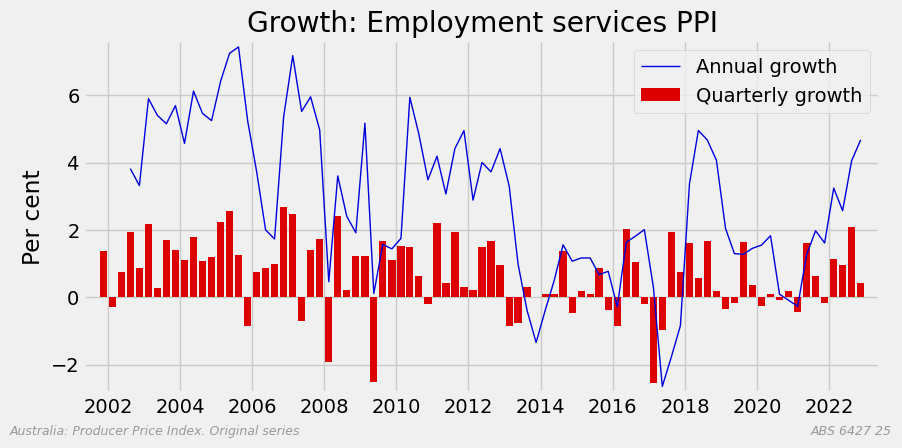

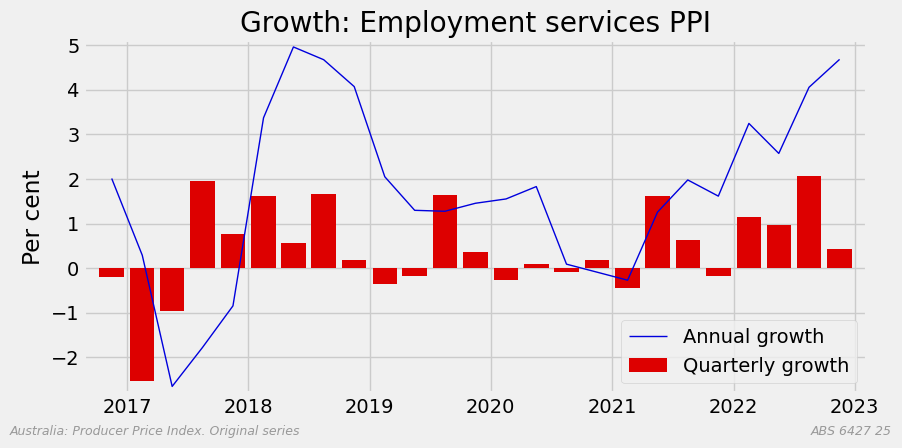

In [11]:
get = {
    ('30 Building construction Australia ;', '17'): 'Building construction Australia',
    ('Road freight transport ', '21'): 'Road freight transport',
    ('Employment services', '25'): 'Employment services',
    
}

for key, label in get.items():
    select_phrase, table = key
    data = abs_dict[table]
    terms = {
            table: table_col,
            select_phrase: desc_col, 
            'Index Number': desc_col, 
    }
    ident, units = find_id(meta, terms, verbose=True)
    q = abs_dict[table][ident].pct_change(periods=1, fill_method=None) * 100
    a = abs_dict[table][ident].pct_change(periods=4, fill_method=None) * 100
    
    # plot
    title = f'Growth: {label} PPI'
    for plot_from, plot_tag in zip(plot_times, plot_tags):
        plot_growth2(a, q, 
                     title, 
                     plot_from, plot_tag, CHART_DIR,
                     rfooter=f'{source} {table}',
                     lfooter=f'Australia: Producer Price Index. Original series',
                     ppy=4, # four periods per year
                     show=True
                 )


## Finished

In [10]:
print('Finished')

Finished
